<a href="https://colab.research.google.com/github/YopaNelly/AI-ML-Basics/blob/main/ARIMMA_XGBOOST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
import joblib
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd


In [5]:
# unzip file

!unzip /content/archive2.zip


Archive:  /content/archive2.zip
  inflating: MD_Crime_Data.csv       


In [6]:
df = pd.read_csv('MD_Crime_Data.csv')
# Dropping the null values
data=df.dropna()

# drop repetitive columns

data.tail()

,JURISDICTION,YEAR,POPULATION,MURDER,RAPE,ROBBERY,AGG. ASSAULT,B & E,LARCENY THEFT,M/V THEFT,...,"B & E PER 100,000 PEOPLE","LARCENY THEFT PER 100,000 PEOPLE","M/V THEFT PER 100,000 PEOPLE","MURDER RATE PERCENT CHANGE PER 100,000 PEOPLE","RAPE RATE PERCENT CHANGE PER 100,000 PEOPLE","ROBBERY RATE PERCENT CHANGE PER 100,000 PEOPLE","AGG. ASSAULT RATE PERCENT CHANGE PER 100,000 PEOPLE","B & E RATE PERCENT CHANGE PER 100,000 PEOPLE","LARCENY THEFT RATE PERCENT CHANGE PER 100,000 PEOPLE","M/V THEFT RATE PERCENT CHANGE PER 100,000 PEOPLE"
1099,Worcester County,2016,51255,3,17,39,93,289,1514,32,...,563.8,2953.9,62.4,201.8,14.0,45.3,-8.3,6.5,-2.5,15.0
1100,Worcester County,2017,51408,2,26,43,106,220,1514,39,...,427.9,2945.1,75.9,-33.5,52.5,9.9,13.6,-24.1,-0.3,21.5
1101,Worcester County,2018,51304,0,12,24,88,215,1178,34,...,419.1,2296.1,66.3,-100.0,-53.8,-44.1,-16.8,-2.1,-22.0,-12.6
1102,Worcester County,2019,51606,0,12,24,94,186,1086,30,...,360.4,2104.4,58.1,0.0,-0.6,-0.6,6.2,-14.0,-8.3,-12.3
1103,Worcester County,2020,52191,1,31,39,163,189,1085,28,...,362.1,2078.9,53.6,191.6,155.4,60.7,71.5,0.5,-1.2,-7.7


In [7]:
data = data[["JURISDICTION", "YEAR", "OVERALL CRIME RATE PER 100,000 PEOPLE"]]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE for Allegany County: 486.7200094602988
ARIMA-XGBoost model for Allegany County saved to saved_models/Allegany County_arima_xgboost_model.pkl


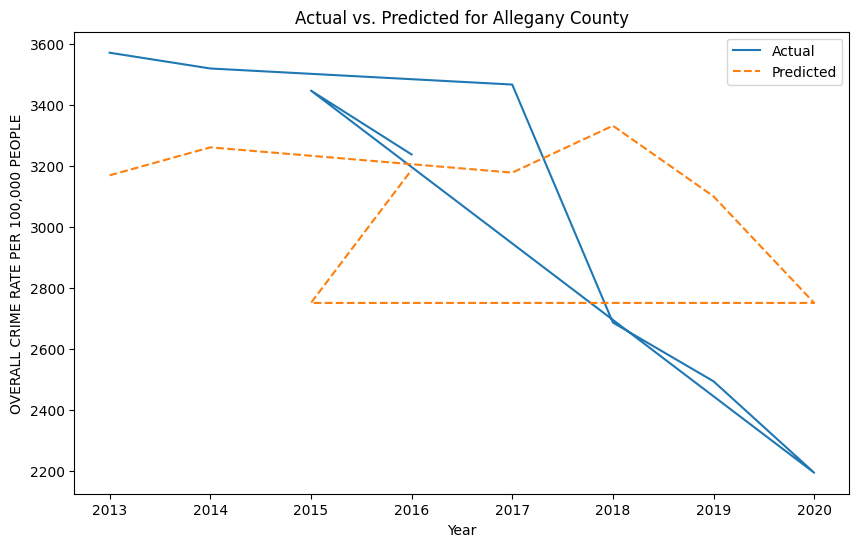

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE for Anne Arundel County: 1982.107909882606
ARIMA-XGBoost model for Anne Arundel County saved to saved_models/Anne Arundel County_arima_xgboost_model.pkl


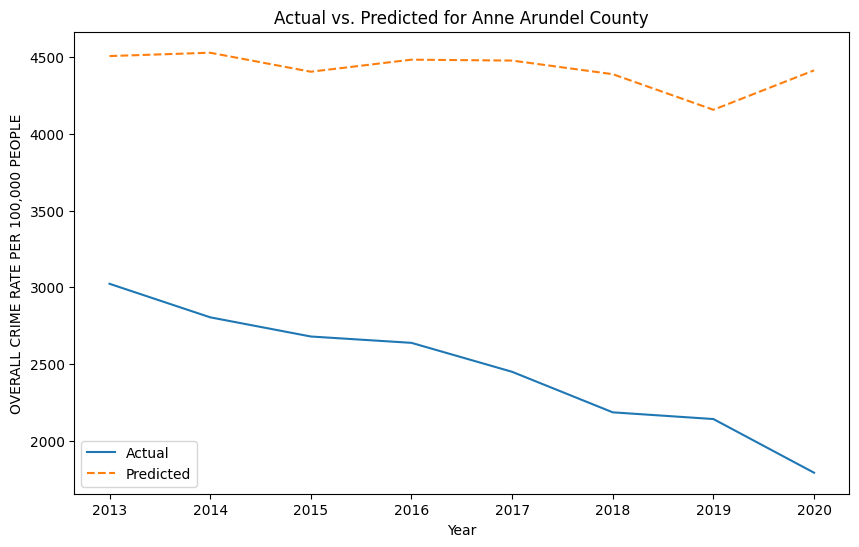

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE for Baltimore City: 2830.0514289754838
ARIMA-XGBoost model for Baltimore City saved to saved_models/Baltimore City_arima_xgboost_model.pkl


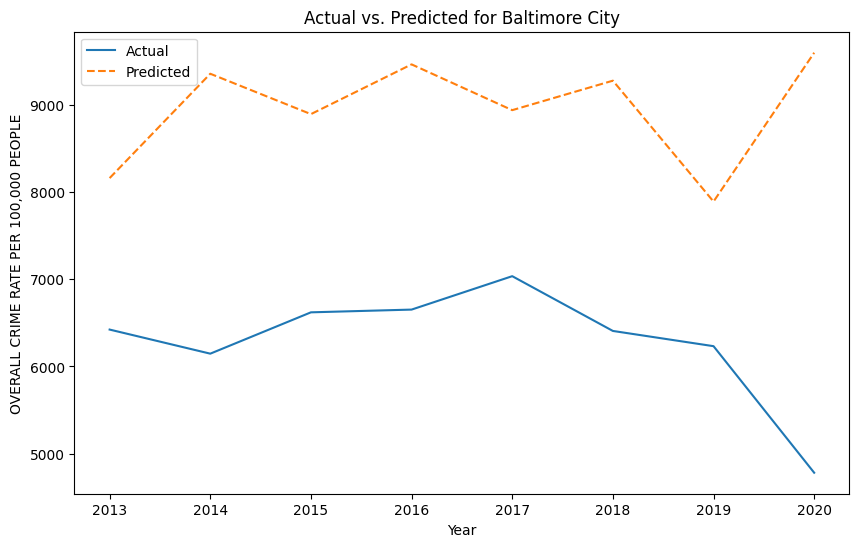

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE for Baltimore County: 1547.8881789727902
ARIMA-XGBoost model for Baltimore County saved to saved_models/Baltimore County_arima_xgboost_model.pkl


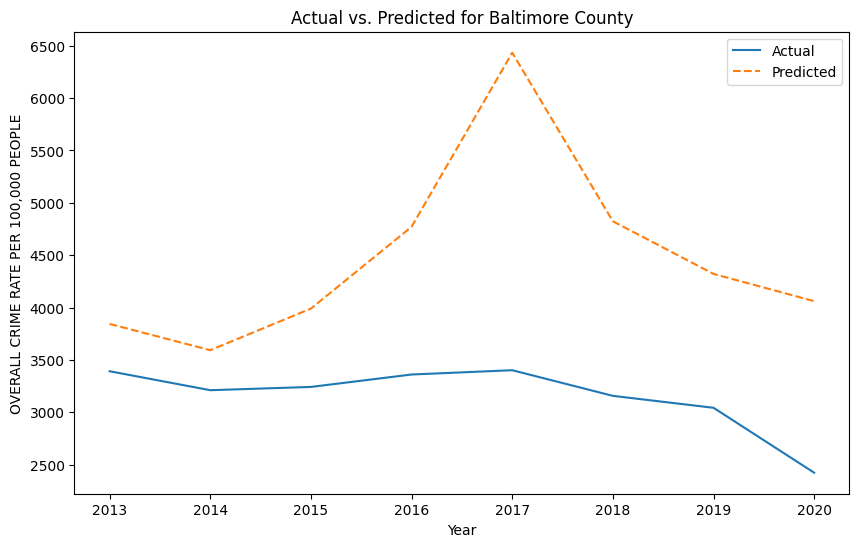

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE for Calvert County: 1025.540432981893
ARIMA-XGBoost model for Calvert County saved to saved_models/Calvert County_arima_xgboost_model.pkl


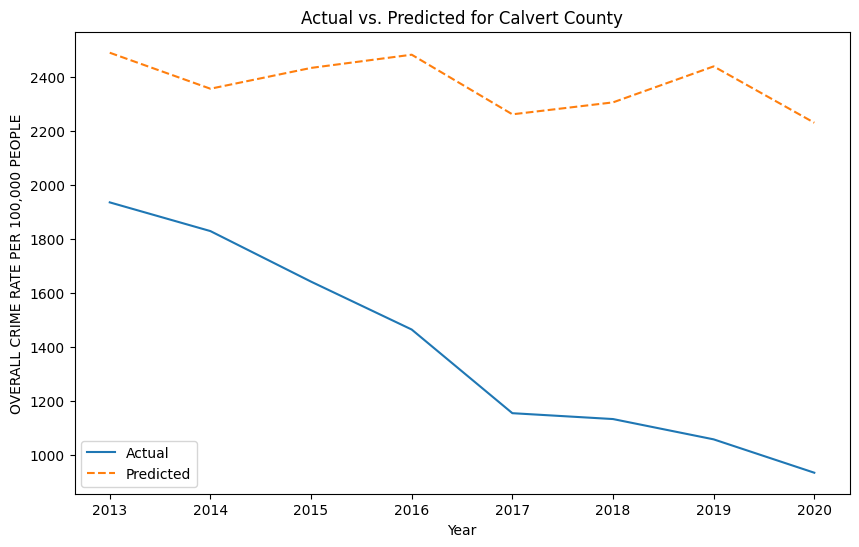

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE for Caroline County: 1063.7346532361
ARIMA-XGBoost model for Caroline County saved to saved_models/Caroline County_arima_xgboost_model.pkl


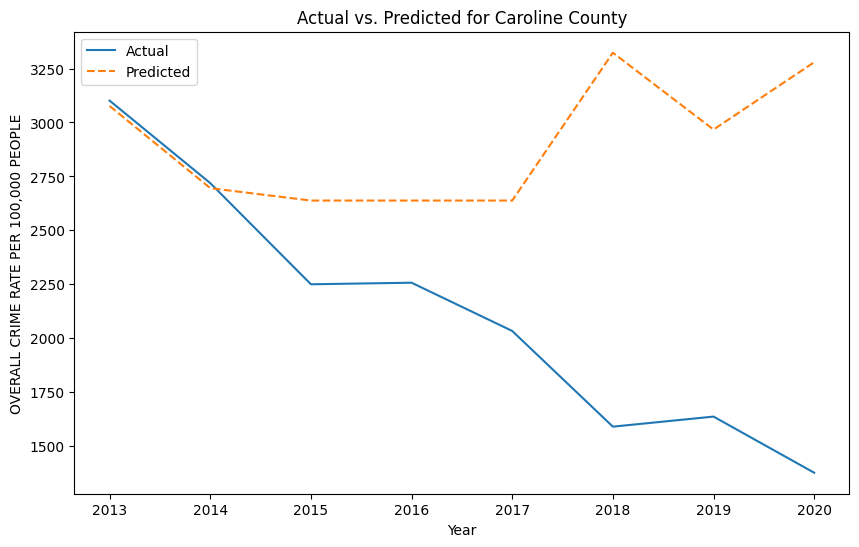

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE for Carroll County: 833.2695423330448
ARIMA-XGBoost model for Carroll County saved to saved_models/Carroll County_arima_xgboost_model.pkl


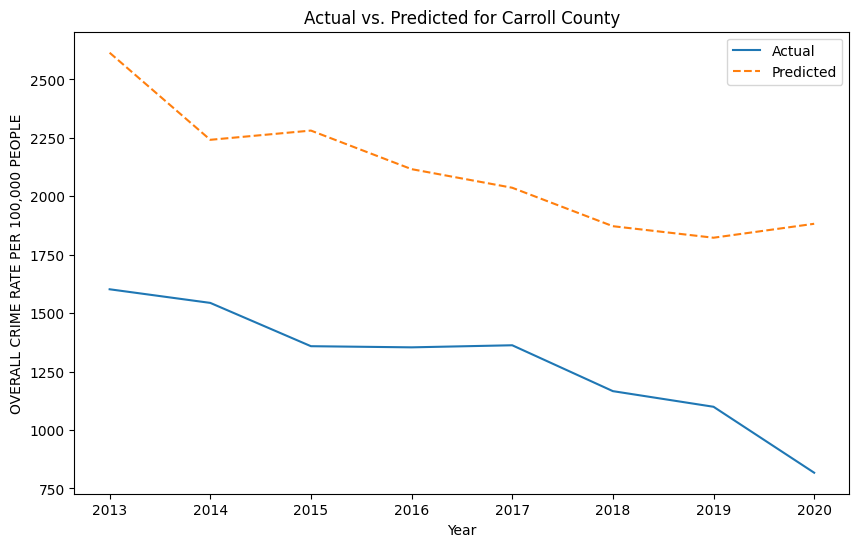

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE for Cecil County: 873.8093041707069
ARIMA-XGBoost model for Cecil County saved to saved_models/Cecil County_arima_xgboost_model.pkl


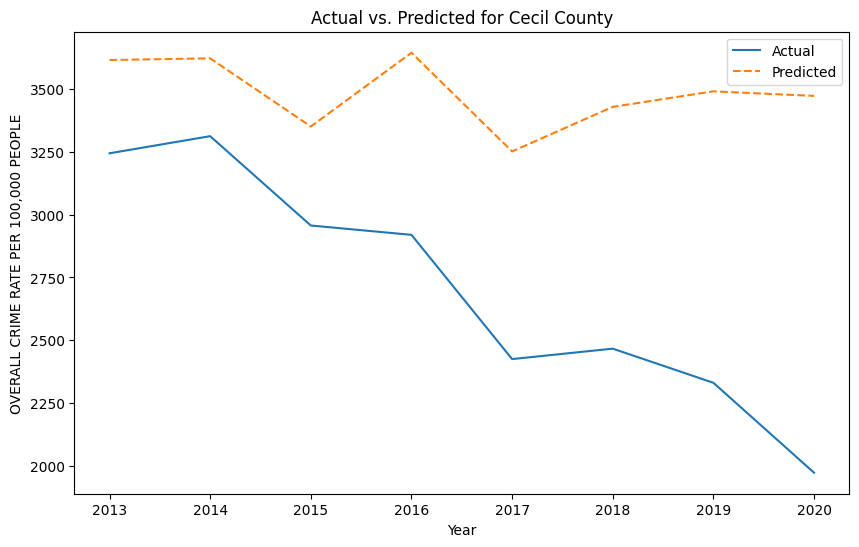

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE for Charles County: 1711.0250219739742
ARIMA-XGBoost model for Charles County saved to saved_models/Charles County_arima_xgboost_model.pkl


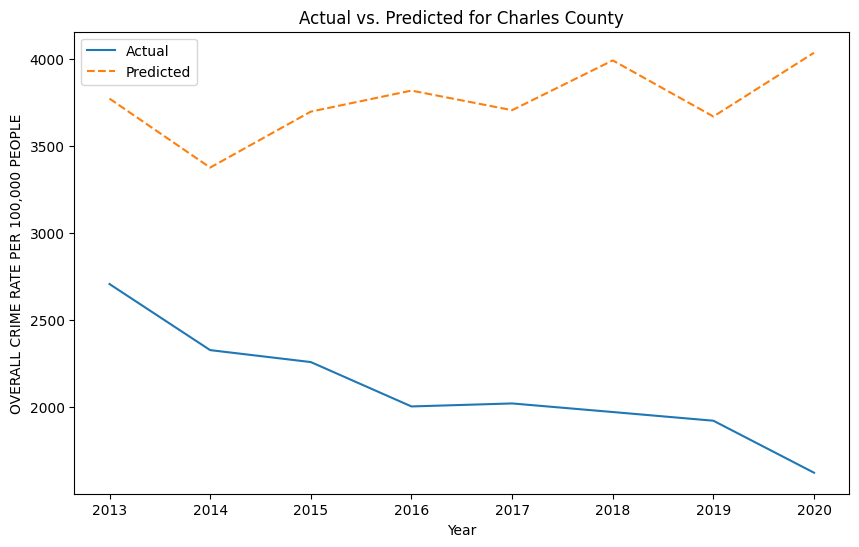

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE for Dorchester County: 822.8340512270688
ARIMA-XGBoost model for Dorchester County saved to saved_models/Dorchester County_arima_xgboost_model.pkl


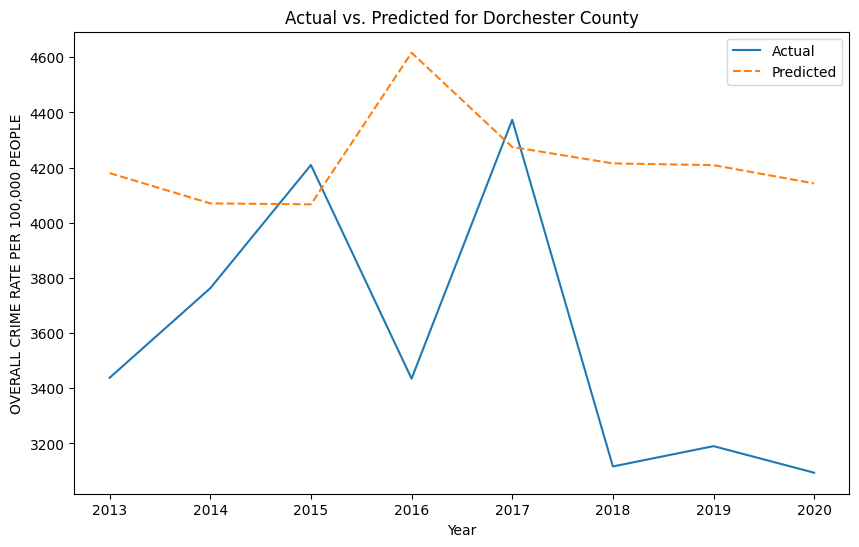

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE for Frederick County: 1219.6361817980319
ARIMA-XGBoost model for Frederick County saved to saved_models/Frederick County_arima_xgboost_model.pkl


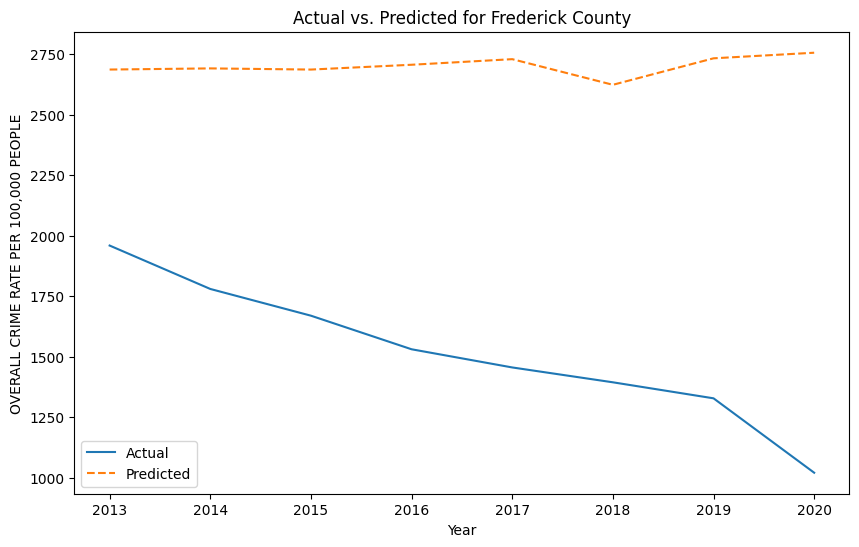

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE for Garrett County: 518.0528312683119
ARIMA-XGBoost model for Garrett County saved to saved_models/Garrett County_arima_xgboost_model.pkl


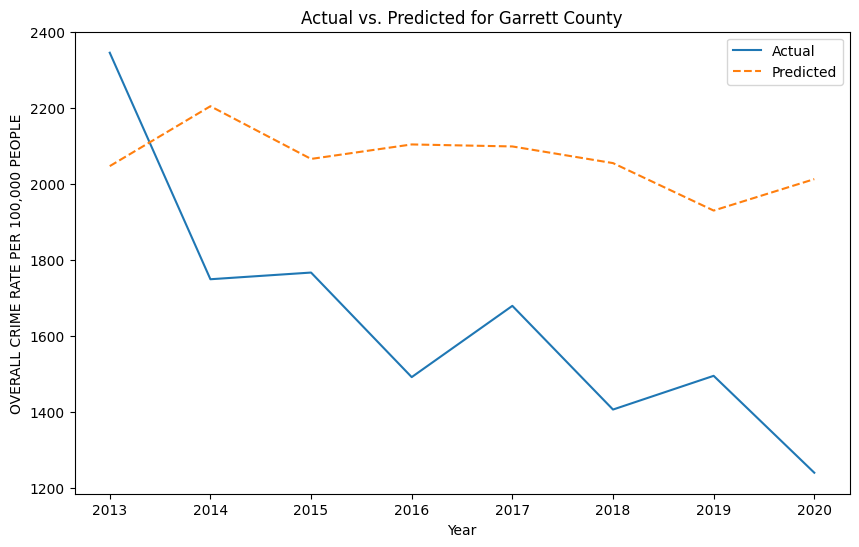

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE for Harford County: 1435.6659192699221
ARIMA-XGBoost model for Harford County saved to saved_models/Harford County_arima_xgboost_model.pkl


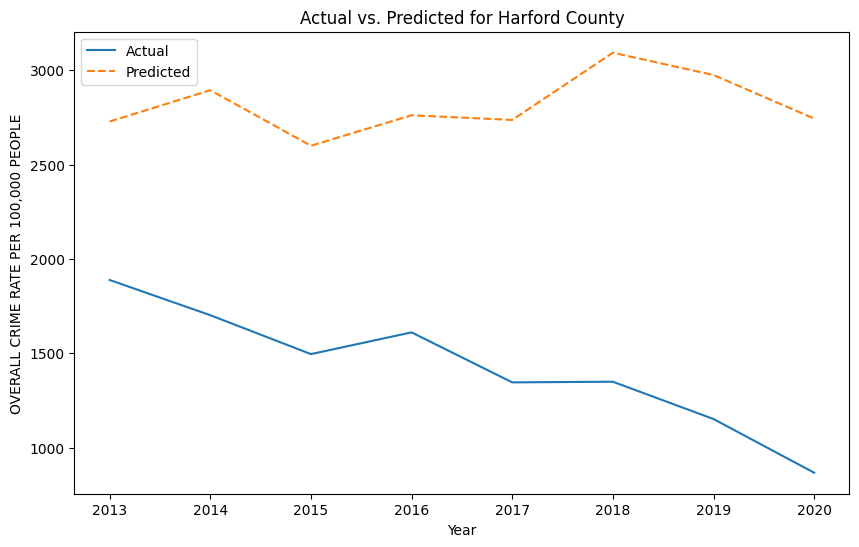

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE for Howard County: 1688.7664715669805
ARIMA-XGBoost model for Howard County saved to saved_models/Howard County_arima_xgboost_model.pkl


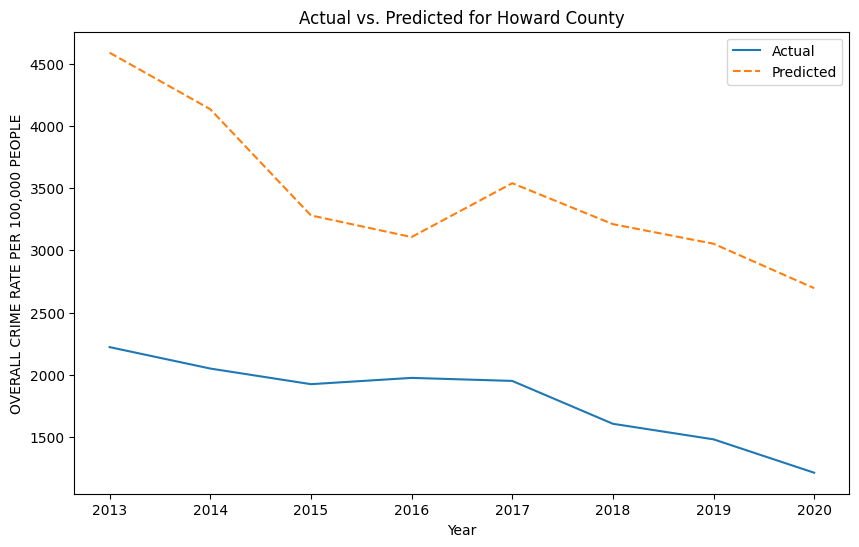

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE for Kent County: 1157.3568134247344
ARIMA-XGBoost model for Kent County saved to saved_models/Kent County_arima_xgboost_model.pkl


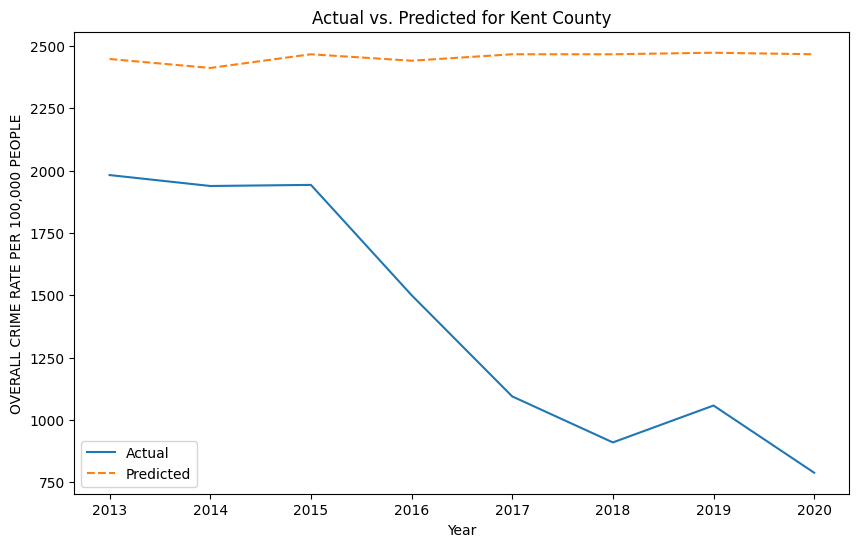

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE for Montgomery County: 1434.3797780693806
ARIMA-XGBoost model for Montgomery County saved to saved_models/Montgomery County_arima_xgboost_model.pkl


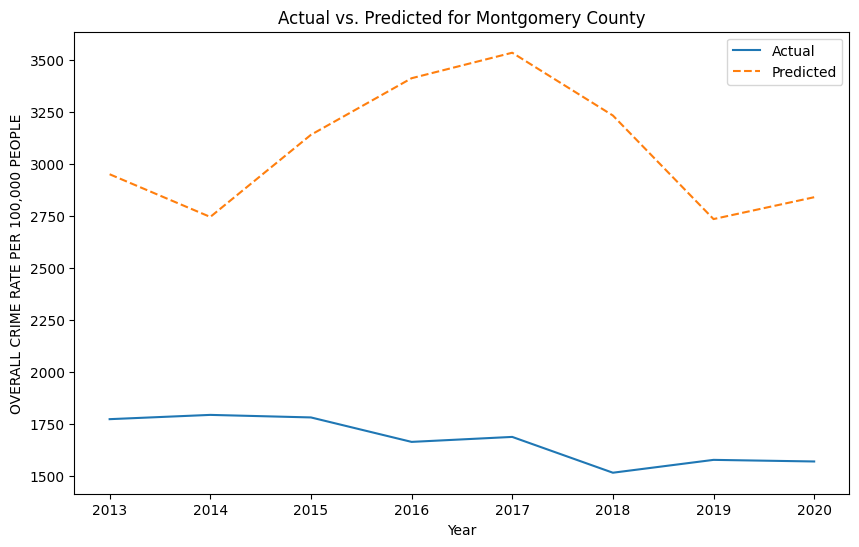

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE for Prince George's County: 3968.045743464918
ARIMA-XGBoost model for Prince George's County saved to saved_models/Prince George's County_arima_xgboost_model.pkl


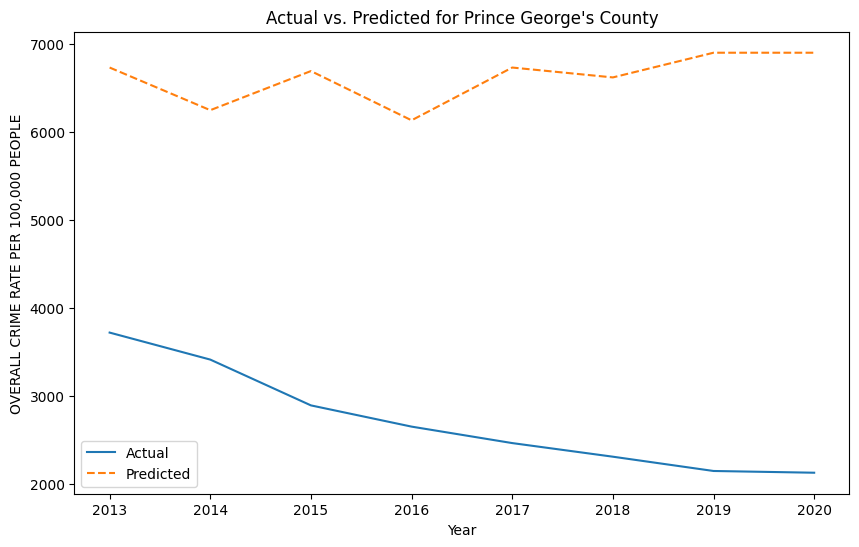

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE for Queen Anne's County: 1244.9881888755313
ARIMA-XGBoost model for Queen Anne's County saved to saved_models/Queen Anne's County_arima_xgboost_model.pkl


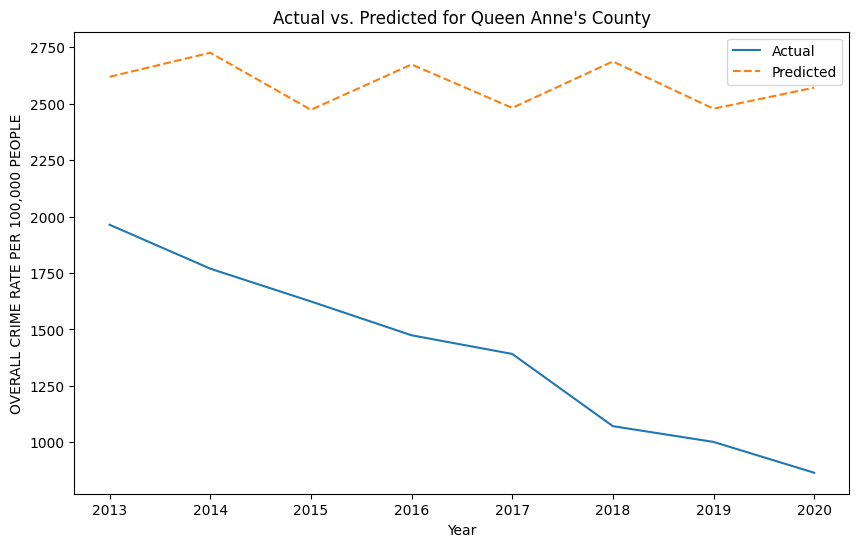

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE for Somerset County: 1294.4378113681098
ARIMA-XGBoost model for Somerset County saved to saved_models/Somerset County_arima_xgboost_model.pkl


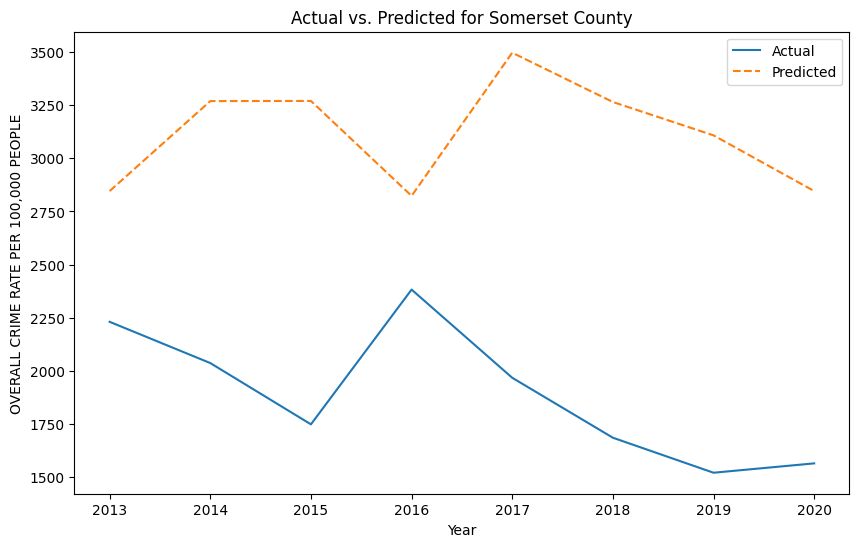

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE for St. Mary's County: 859.2634991031468
ARIMA-XGBoost model for St. Mary's County saved to saved_models/St. Mary's County_arima_xgboost_model.pkl


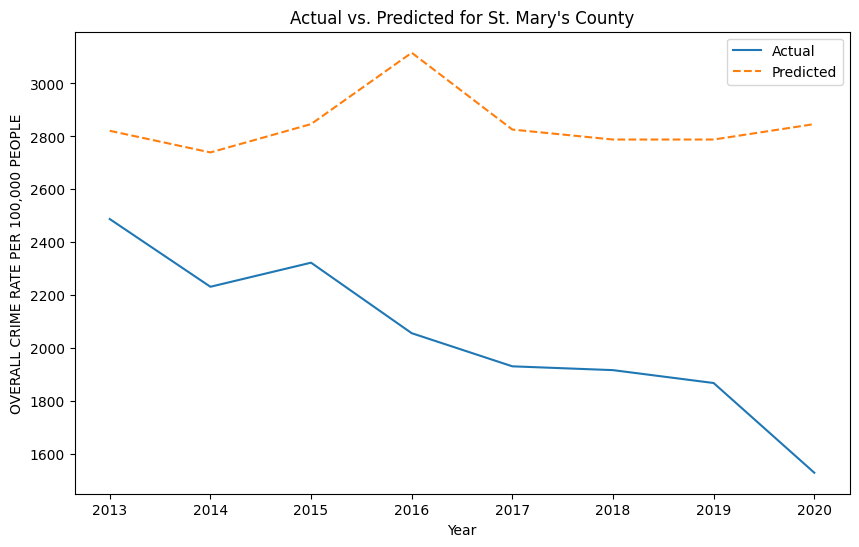

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE for Talbot County: 1503.2324756578287
ARIMA-XGBoost model for Talbot County saved to saved_models/Talbot County_arima_xgboost_model.pkl


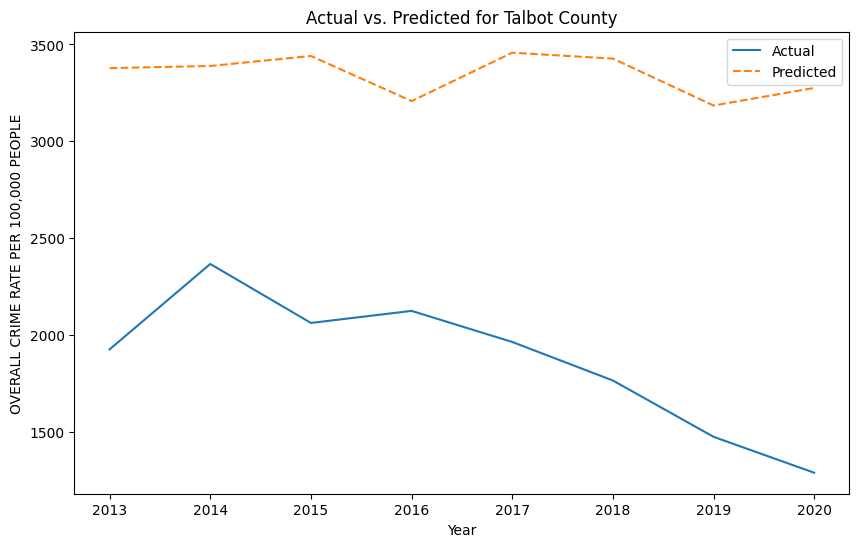

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE for Washington County: 553.7815033430652
ARIMA-XGBoost model for Washington County saved to saved_models/Washington County_arima_xgboost_model.pkl


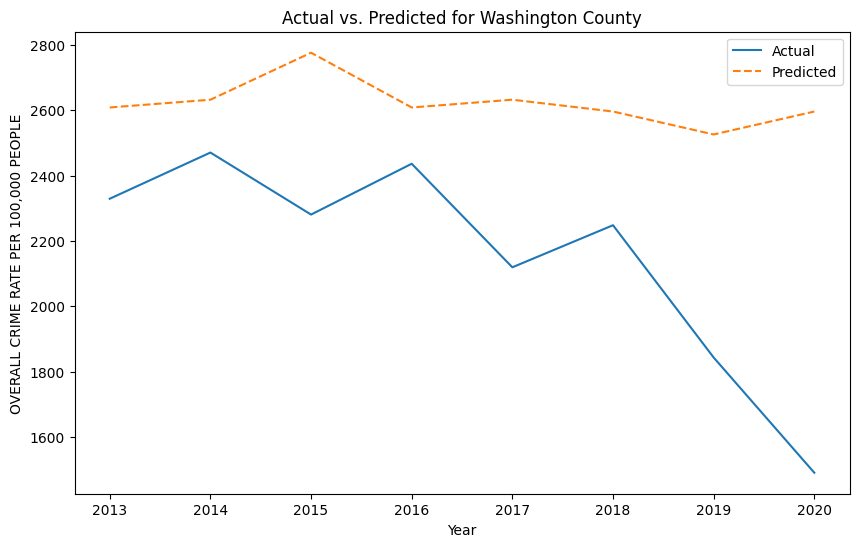

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE for Wicomico County: 1980.9334708471158
ARIMA-XGBoost model for Wicomico County saved to saved_models/Wicomico County_arima_xgboost_model.pkl


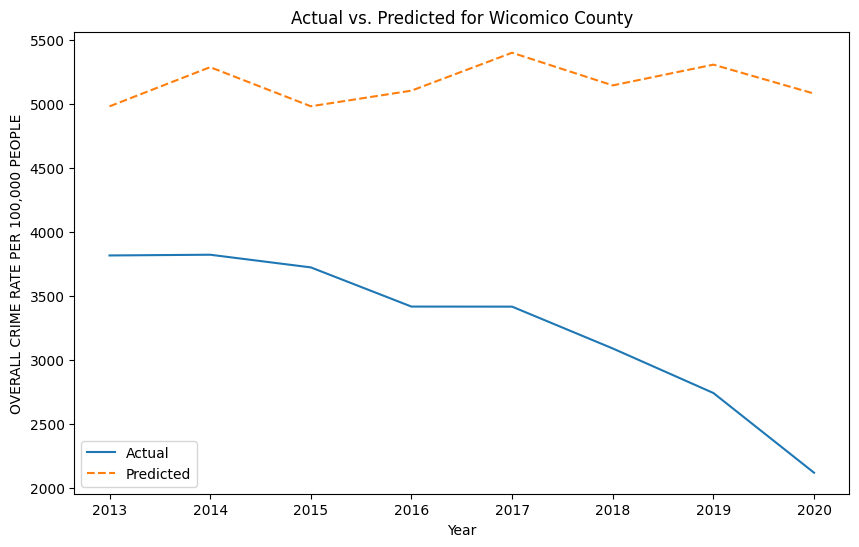

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE for Worcester County: 2727.870964109686
ARIMA-XGBoost model for Worcester County saved to saved_models/Worcester County_arima_xgboost_model.pkl


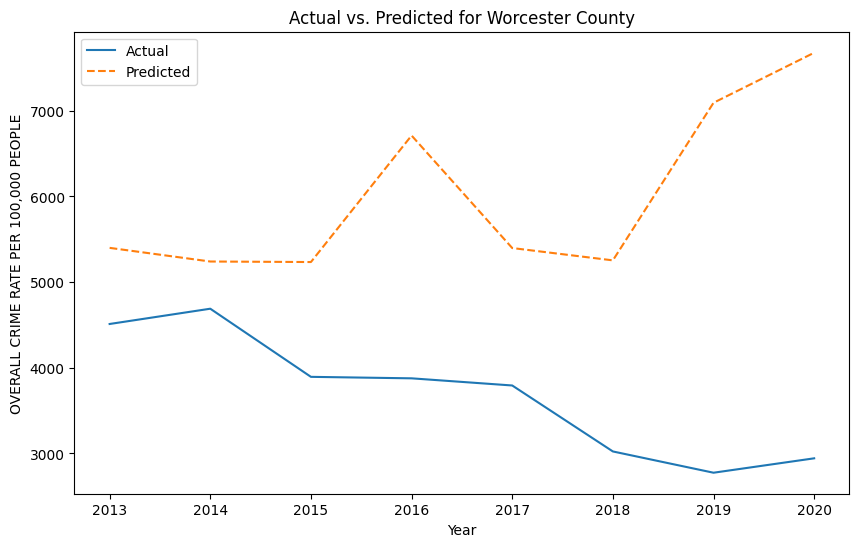

In [8]:
# Define the target
target = 'OVERALL CRIME RATE PER 100,000 PEOPLE'
features = []  # Add other relevant feature columns

# Create a directory to save the models if it doesn't exist
model_dir = 'saved_models'
os.makedirs(model_dir, exist_ok=True)

# Loop over each jurisdiction
for jurisdiction in data['JURISDICTION'].unique():
    jurisdiction_data = data[data['JURISDICTION'] == jurisdiction].copy()
    jurisdiction_data.set_index('YEAR', inplace=True)

    if target not in jurisdiction_data.columns:
        print(f"Error: Target column '{target}' not found in the data for jurisdiction '{jurisdiction}'")
        continue

    # Fit ARIMA model
    arima_order = (5, 1, 0)  # ARIMA(p,d,q) configuration (can be tuned)
    arima_model = ARIMA(jurisdiction_data[target], order=arima_order)
    arima_result = arima_model.fit()

    # Get residuals from ARIMA model
    residuals = arima_result.resid

    # Create lagged features for XGBoost
    for lag in range(1, 6):
        jurisdiction_data[f'{target}_lag{lag}'] = residuals.shift(lag)

    jurisdiction_data.dropna(inplace=True)

    X = jurisdiction_data[features + [f'{target}_lag{lag}' for lag in range(1, 6)]]
    y = jurisdiction_data[target]

    split_index = int(0.8 * len(X))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Hyperparameter tuning for XGBoost
    param_grid = {
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'n_estimators': [100, 200, 300]
    }
    xgb_model = XGBRegressor(random_state=42)
    grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)

    best_xgb_model = grid_search.best_estimator_
    y_pred = best_xgb_model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"RMSE for {jurisdiction}: {rmse}")

    # Save the ARIMA and XGBoost models together
    model_filename = os.path.join(model_dir, f'{jurisdiction}_arima_xgboost_model.pkl')
    joblib.dump((arima_result, best_xgb_model), model_filename)
    print(f"ARIMA-XGBoost model for {jurisdiction} saved to {model_filename}")

    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.index, y_test, label='Actual')
    plt.plot(y_test.index, y_pred, label='Predicted', linestyle='--')
    plt.title(f'Actual vs. Predicted for {jurisdiction}')
    plt.xlabel('Year')
    plt.ylabel(target)
    plt.legend()
    plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/u

Predicted Crime Rates for Howard County from 2024 to 2030:
2024: 5989.21
2025: 6074.04
2026: 6163.48
2027: 6163.48
2028: 6163.48
2029: 6163.48
2030: 6163.48


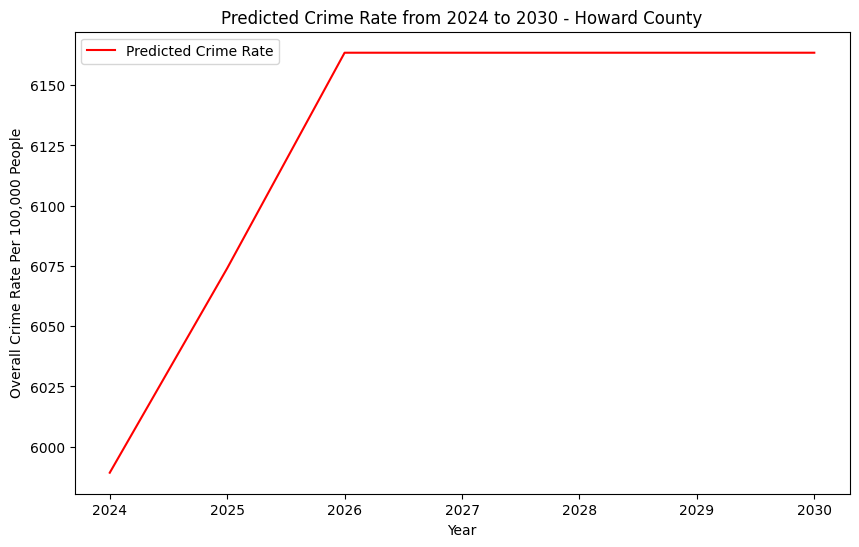

In [9]:
def predict_crime_rate(jurisdiction, start_year, end_year, model_dir, data):
    # Ensure the years are within a valid range
    if start_year < 1980 or end_year < 1980:
        raise ValueError("Years must be 1980 or later.")
    if start_year > end_year:
        raise ValueError("Start year must be less than or equal to end year.")

    # Load the saved ARIMA-XGBoost model for the jurisdiction
    model_filename = os.path.join(model_dir, f'{jurisdiction}_arima_xgboost_model.pkl')
    if not os.path.exists(model_filename):
        raise FileNotFoundError(f"No saved model found for jurisdiction '{jurisdiction}' at '{model_filename}'")

    # Load the ARIMA and XGBoost models
    arima_model, xgb_model = joblib.load(model_filename)

    # Filter data for the current jurisdiction
    jurisdiction_data = data[data['JURISDICTION'] == jurisdiction].copy()

    # Ensure YEAR is the index
    jurisdiction_data = jurisdiction_data.set_index('YEAR')

    # Get ARIMA predictions (fitted values)
    arima_predictions = arima_model.predict(start=jurisdiction_data.index[0], end=jurisdiction_data.index[-1])

    # Calculate the residuals
    residuals = jurisdiction_data['OVERALL CRIME RATE PER 100,000 PEOPLE'] - arima_predictions

    # Generate lagged features based on residuals
    for lag in range(1, 6):  # Assuming a lag of 5
        jurisdiction_data[f'RESIDUAL_lag{lag}'] = residuals.shift(lag)

    # Drop rows with NaN values due to lagging
    jurisdiction_data.dropna(inplace=True)

    # Define the features to be used (only lagged residual features in this case)
    features = [f'RESIDUAL_lag{lag}' for lag in range(1, 6)]

    # Initialize predictions with the last known values
    last_known_values = jurisdiction_data.iloc[-1][features].values
    predictions = []
    prediction_years = range(start_year, end_year + 1)

    for pred_year in prediction_years:
        # Predict the residual using the XGBoost model
        residual_pred = xgb_model.predict(last_known_values.reshape(1, -1))

        # Add the ARIMA prediction to the residual prediction to get the final prediction
        arima_forecast = arima_model.predict(start=pred_year, end=pred_year).values[0]
        final_pred = arima_forecast + residual_pred[0]

        predictions.append(final_pred)

        # Update the lagged residuals for the next prediction
        last_known_values = np.roll(last_known_values, -1)
        last_known_values[-1] = residual_pred[0]

    # Output the list of crime rates from start_year to end_year
    print(f"Predicted Crime Rates for {jurisdiction} from {start_year} to {end_year}:")
    for i, pred_year in enumerate(prediction_years):
        print(f"{pred_year}: {predictions[i]:.2f}")

    # Plot the crime rates over the years
    plt.figure(figsize=(10, 6))
    plt.plot(prediction_years, predictions, label='Predicted Crime Rate', color='red')
    plt.title(f'Predicted Crime Rate from {start_year} to {end_year} - {jurisdiction}')
    plt.xlabel('Year')
    plt.ylabel('Overall Crime Rate Per 100,000 People')
    plt.legend()
    plt.show()

# Example Usage:
# Assuming `data` is the DataFrame containing the necessary data.
model_directory = 'saved_models'
predict_crime_rate('Howard County', 2024, 2030, model_directory, data)
